### GIVEN ANY RANDOMIZED DATA AND A TARGET CLASS HOW COULD WE PROCEED TO GET INSIGHTS FROM THE DATA AND PREDICT THE CORRECT TARGET CLASS FOR A NEW OUTCOME.
### THE ANSWER IS SIMPLE USE K-NEAREST NEIGHBOURS.

#### IMPORTING NECESSARY LIBRARIES

In [5]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt
%matplotlib inline

#### IMPORTING THE RANDOM DATA

In [38]:
df=pd.read_csv("./KNN_Project_Data")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


#### PERFORMING SOME EXPLORATORY DATA ANALYSIS(EDA)

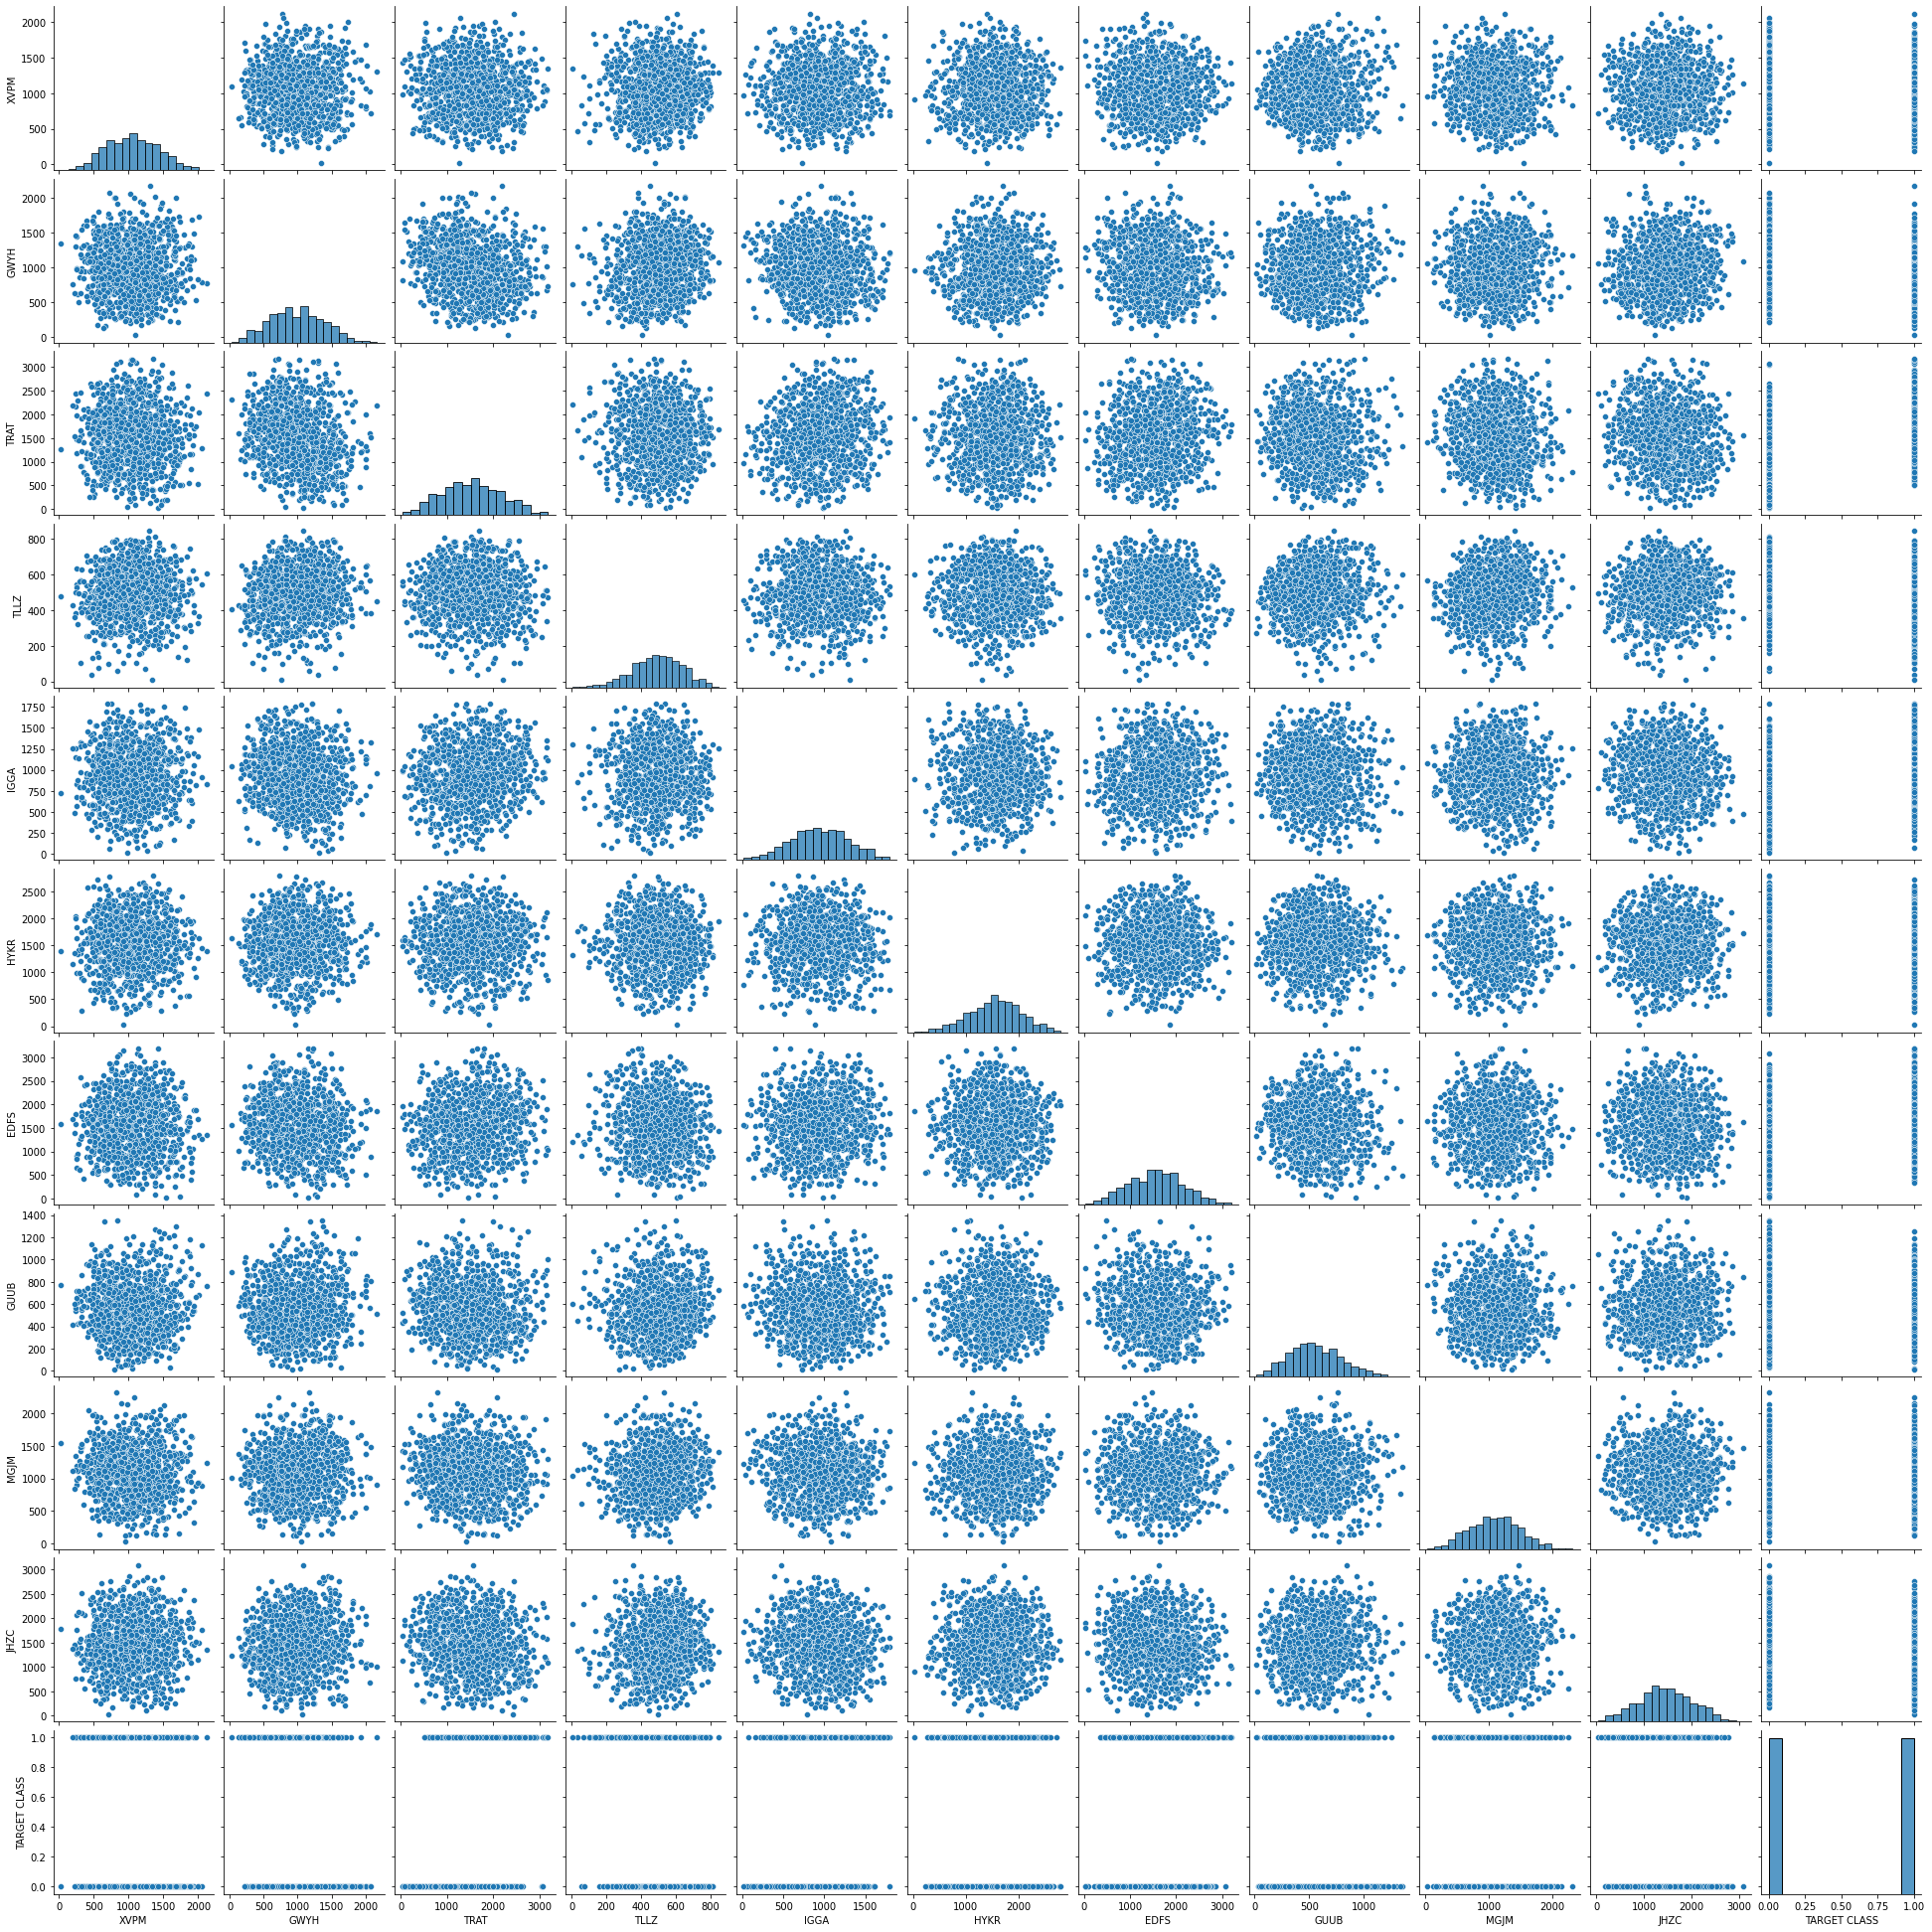

In [39]:
sns.pairplot(df)

#### AS THE DATA IS RANDOMIZED WE NEED TO PERFORM SOME SCALING ON OUR VARIABLES SO THAT THAT MAKES US AND OUR MODEL TO ANALYSIZE DATA AND PREDICT THE CORRECT OUTCOME

In [41]:
x=df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']]
y=df['TARGET CLASS']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

#### TRANSFORMED THE SCALED OBJECTS

In [42]:
scaled_var=scaler.transform(x)
df_scaled=pd.DataFrame(scaled_var,columns=x.columns)
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


#### TRAIN TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

#### CREATING OUR MACHINE LEARNING MODEL(K-NEAREST NEIGHBOURS) WITH A SINGLE NEIGHBOUR AT FIRST

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### DRAWING PREDICTIONS FROM OUR MODEL

In [45]:
pred=knn.predict(x_test)
print(pred)

[1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0]


#### EVALUATING OUR MODEL AT INITIAL CONDITIONS

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.74      0.74      0.74       148

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300

[[113  39]
 [ 39 109]]


### AS THE ACCURACY IS POOR WE NEED TO PREDICT THE BEST K-VALUE FOR THE BEST ACCURACY FOR THIS WE DESIGN 'THE ELBOW CURVE'

#### ELBOW CURVE DESIGN

In [56]:
error_mtx=[]
for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_mtx.append(np.mean(pred_i!=y_test))

#### VISUALIZING THE ELBOW CURVE

Text(0, 0.5, 'ERROR_RATE')

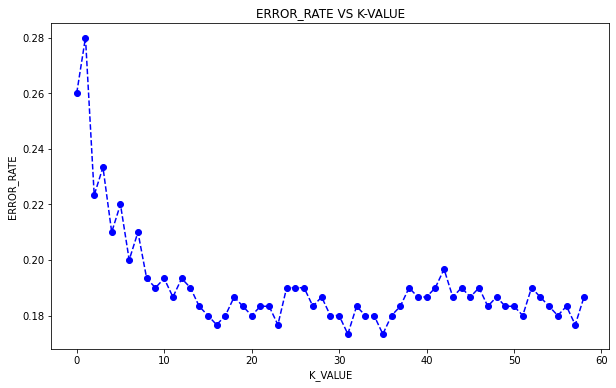

In [57]:
plt.figure(figsize=(10,6))
plt.plot(error_mtx,linestyle='--',color='blue',marker='o')
plt.title("ERROR_RATE VS K-VALUE")
plt.xlabel("K_VALUE")
plt.ylabel("ERROR_RATE")

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(x_train,y_train)
pred_new=knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred_new,y_test))
print(confusion_matrix(pred_new,y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       148
           1       0.84      0.82      0.83       152

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[124  24]
 [ 28 124]]


#### HERE WE CAN ACTUALLY SEE THAT THE SIGNIFICANT RISE IN OUR MODEL'S ACCURACY(~10%) BY CHOSING THE OPTIMAL VALUE OF K=32 ACCORDING TO THE ELBOW CURVE